## Outil pour traiter les fichiers XML servants à l'emission des Garanties d'Origine

---

In [1]:
import xml.etree.ElementTree as et
import os
import pandas as pd
import numpy as np

C:\Users\AlexandreCastanie\Dropbox (ekwateur)\Fourniture d'énergie\1 - ELECTRICITE\12 - ACHAT DIRECT\SIPPEREC\Données de comptage - Archives\SIPPEREC

In [2]:
chemin=input("Chemin du dossier contenant les fichiers XML : ")

In [4]:
chemins = []
for racine, dirs, fichiers in os.walk(chemin):
    for file in fichiers:
        if file.endswith(".xml"):
            s = os.path.join(racine, file)
            chemins.append(s)
print(f"Nombre de fichiers xml trouvés = {len(chemins)}")

Nombre de fichiers xml trouvés = 123


In [4]:
# def extract_date(element):
#     horodatage_debut = element[1].find('./Corps/Donnees_Courbe/Horodatage_Debut')
#     if horodatage_debut is not None:
#         return horodatage_debut.text

In [5]:
racines=[]
for chemin in chemins: 
    tree = et.parse(chemin)
    racines.append((tree,tree.getroot()))
#racines=sorted(racines,key=extract_date)

In [6]:
def test_Numeros_PRM(racines):
    a=0
    for tree,racine in racines:
        if int(racine[1][0].text)==50018335145659:
            a+=1
    if a==len(chemins):
        return "Tous les identifiants PRM sont cohérents"
    else:
        return f"Il y a {len(chemins)-a} fichiers qui possèdent des identifiants PRM inattendus"

In [7]:
test_Numeros_PRM(racines)

'Tous les identifiants PRM sont cohérents'

In [8]:
Donnees_octobre_2022,Donnees_novembre_2022,Donnees_decembre_2022,Donnees_janvier_2023,Donnees_fevrier_2023=[],[],[],[],[]
for tree,racine in racines:
    date_debut=pd.to_datetime(racine[1][1][0].text,utc=True).tz_convert('Europe/Paris')
    date_fin=pd.to_datetime(racine[1][1][1].text,utc=True).tz_convert('Europe/Paris')
    if date_debut>=pd.to_datetime('2022-10').tz_localize('Europe/Paris') and date_fin<pd.to_datetime('2022-11').tz_localize('Europe/Paris'):
        Donnees_octobre_2022.append((tree,racine))
    elif date_debut>=pd.to_datetime('2022-11').tz_localize('Europe/Paris') and date_fin<pd.to_datetime('2022-12').tz_localize('Europe/Paris'):
        Donnees_novembre_2022.append((tree,racine))
    elif date_debut>=pd.to_datetime('2022-12').tz_localize('Europe/Paris') and date_fin<pd.to_datetime('2023-01').tz_localize('Europe/Paris'):
        Donnees_decembre_2022.append((tree,racine))
    elif date_debut>=pd.to_datetime('2023-01').tz_localize('Europe/Paris') and date_fin<pd.to_datetime('2023-02').tz_localize('Europe/Paris'):
        Donnees_janvier_2023.append((tree,racine))
    elif date_debut>=pd.to_datetime('2023-02').tz_localize('Europe/Paris') and date_fin<pd.to_datetime('2023-03').tz_localize('Europe/Paris'):
        Donnees_fevrier_2023.append((tree,racine))

In [9]:
def concatenation(liste_mois):
    del liste_mois[0][1][1][3]
    del liste_mois[0][1][1][2]

    for i in range(1,len(liste_mois)):
        liste_mois[0][1][1].append(liste_mois[i][1][1][1])

    return liste_mois

In [10]:
Donnees_janvier_2023=concatenation(Donnees_janvier_2023)
Donnees_decembre_2022=concatenation(Donnees_decembre_2022)
Donnees_novembre_2022=concatenation(Donnees_novembre_2022)
Donnees_octobre_2022=concatenation(Donnees_octobre_2022)

In [11]:
Donnees_janvier_2023[0][0].write(r"C:\Users\AlexandreCastanie\Dropbox (ekwateur)\Fourniture d'énergie\1 - ELECTRICITE\12 - ACHAT DIRECT\SIPPEREC\Données de comptage - Archives\Sipperec_janvier_2023.xml")
Donnees_decembre_2022[0][0].write(r"C:\Users\AlexandreCastanie\Dropbox (ekwateur)\Fourniture d'énergie\1 - ELECTRICITE\12 - ACHAT DIRECT\SIPPEREC\Données de comptage - Archives\Sipperec_decembre_2022.xml")
Donnees_novembre_2022[0][0].write(r"C:\Users\AlexandreCastanie\Dropbox (ekwateur)\Fourniture d'énergie\1 - ELECTRICITE\12 - ACHAT DIRECT\SIPPEREC\Données de comptage - Archives\Sipperec_novembre_2022.xml")
Donnees_octobre_2022[0][0].write(r"C:\Users\AlexandreCastanie\Dropbox (ekwateur)\Fourniture d'énergie\1 - ELECTRICITE\12 - ACHAT DIRECT\SIPPEREC\Données de comptage - Archives\Sipperec_octobre_2022.xml")

In [43]:
def Prodtot(Donnees):
    S=0
    l=[]
    for i in range(1,len(Donnees[1])):
        try:
            for j in range(6,len(Donnees[1][i])):
                l.append(float(Donnees[1][i][j].attrib['Valeur_Point'])*(1/6))
                S+=float(Donnees[1][i][j].attrib['Valeur_Point'])*(1/6)
        except : 
            print(f"il y a un mois manquant")
            pass
    return S,l

In [47]:
Prodtot_oct,loct=Prodtot(Donnees_octobre_2022[0][1])
Prodtot_nov,lnov=Prodtot(Donnees_novembre_2022[0][1])
Prodtot_dec,ldec=Prodtot(Donnees_decembre_2022[0][1])
Prodtot_janv,ljanv=Prodtot(Donnees_janvier_2023[0][1])

print(f"production d'octobre = {Prodtot_oct} kWh, {int(np.floor(Prodtot_oct/1000))} MWh\nproduction de novembre = {Prodtot_nov} kWh, {int(np.floor(Prodtot_nov/1000))} MWh\nproduction de décembre = {Prodtot_dec} kWh, {int(np.floor(Prodtot_dec/1000))} MWh\nproduction de janvier = {Prodtot_janv} kWh, {int(np.floor(Prodtot_janv/1000))} MWh")

production d'octobre = 8166.916666666673 kWh, 8 MWh
production de novembre = 3807.333333333335 kWh, 3 MWh
production de décembre = 2114.0000000000014 kWh, 2 MWh
production de janvier = 2490.333333333332 kWh, 2 MWh


Données Samuel :

In [48]:
treeS1=et.parse(r"C:\Users\AlexandreCastanie\Dropbox (ekwateur)\Fourniture d'énergie\1 - ELECTRICITE\12 - ACHAT DIRECT\SIPPEREC\Données de comptage - Archives\Justificatifs\2022_11\SIPPEREC_novembre_2022.xml")
treeS2=et.parse(r"C:\Users\AlexandreCastanie\Dropbox (ekwateur)\Fourniture d'énergie\1 - ELECTRICITE\12 - ACHAT DIRECT\SIPPEREC\Données de comptage - Archives\Justificatifs\2022_10\SIPPEREC_octobre_2022.xml")
racine_SIPPEREC_nov=treeS1.getroot()
racine_SIPPEREC_oct=treeS2.getroot()

In [49]:
S_Ptot_oct,ltotoct=Prodtot(racine_SIPPEREC_oct)
S_Ptot_nov,ltotonov=Prodtot(racine_SIPPEREC_nov)

print(f"production d'octobre = {S_Ptot_oct} kWh, {int(np.floor(S_Ptot_oct/1000))} MWh\nproduction de novembre = {S_Ptot_nov} kWh, {int(np.floor(S_Ptot_nov/1000))} MWh")

il y a un mois manquant
production d'octobre = 7918.333333333342 kWh, 7 MWh
production de novembre = 3807.333333333335 kWh, 3 MWh


Il manque le 26 octobre : pas de valeurs

### Graphiques

---

In [50]:
import matplotlib.pyplot as plt

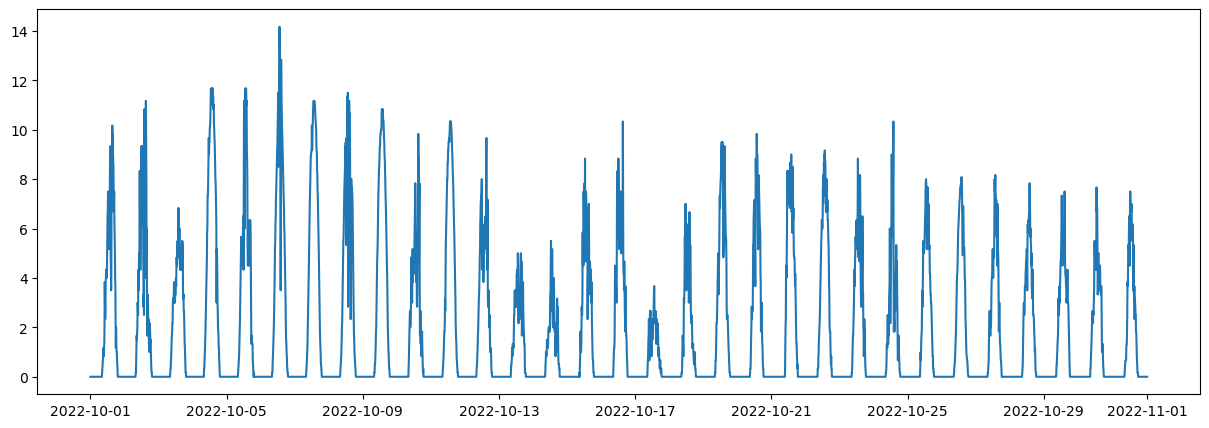

In [51]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax=plt.plot(pd.date_range(start=pd.Timestamp('2022-10-01 00:00:00', tz='Europe/Paris'),
                                         end=pd.Timestamp('2022-10-31 23:50:00', tz='Europe/Paris'),freq='10T'),loct)
plt.show()